In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Admission_Predict.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.drop(["Serial No."], axis =1,inplace = True)

In [5]:
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

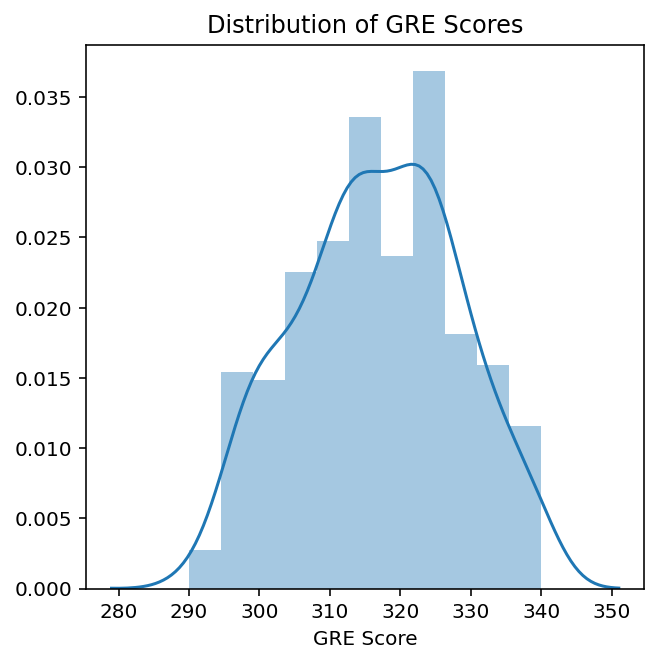

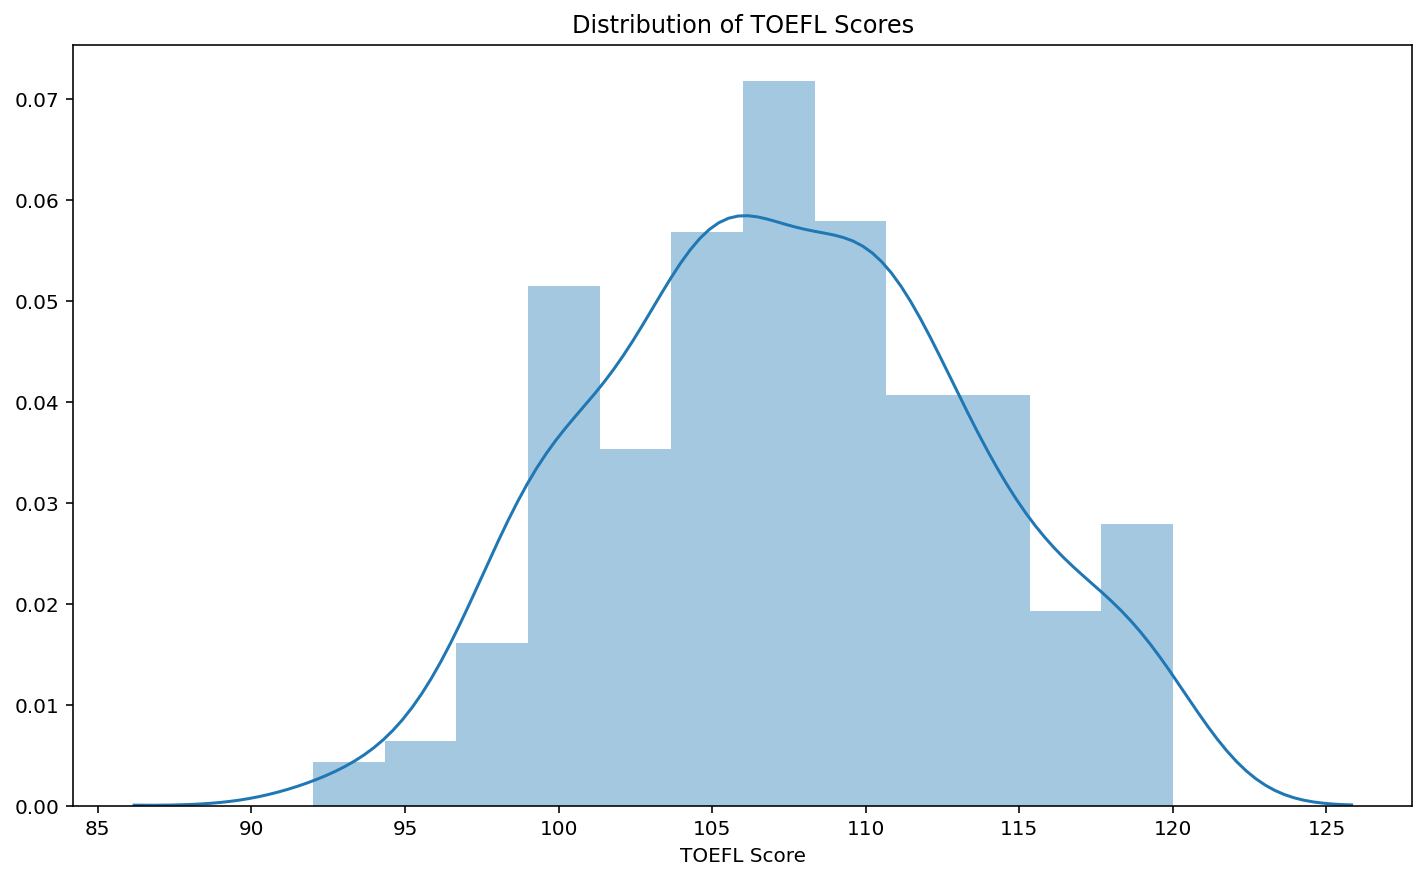

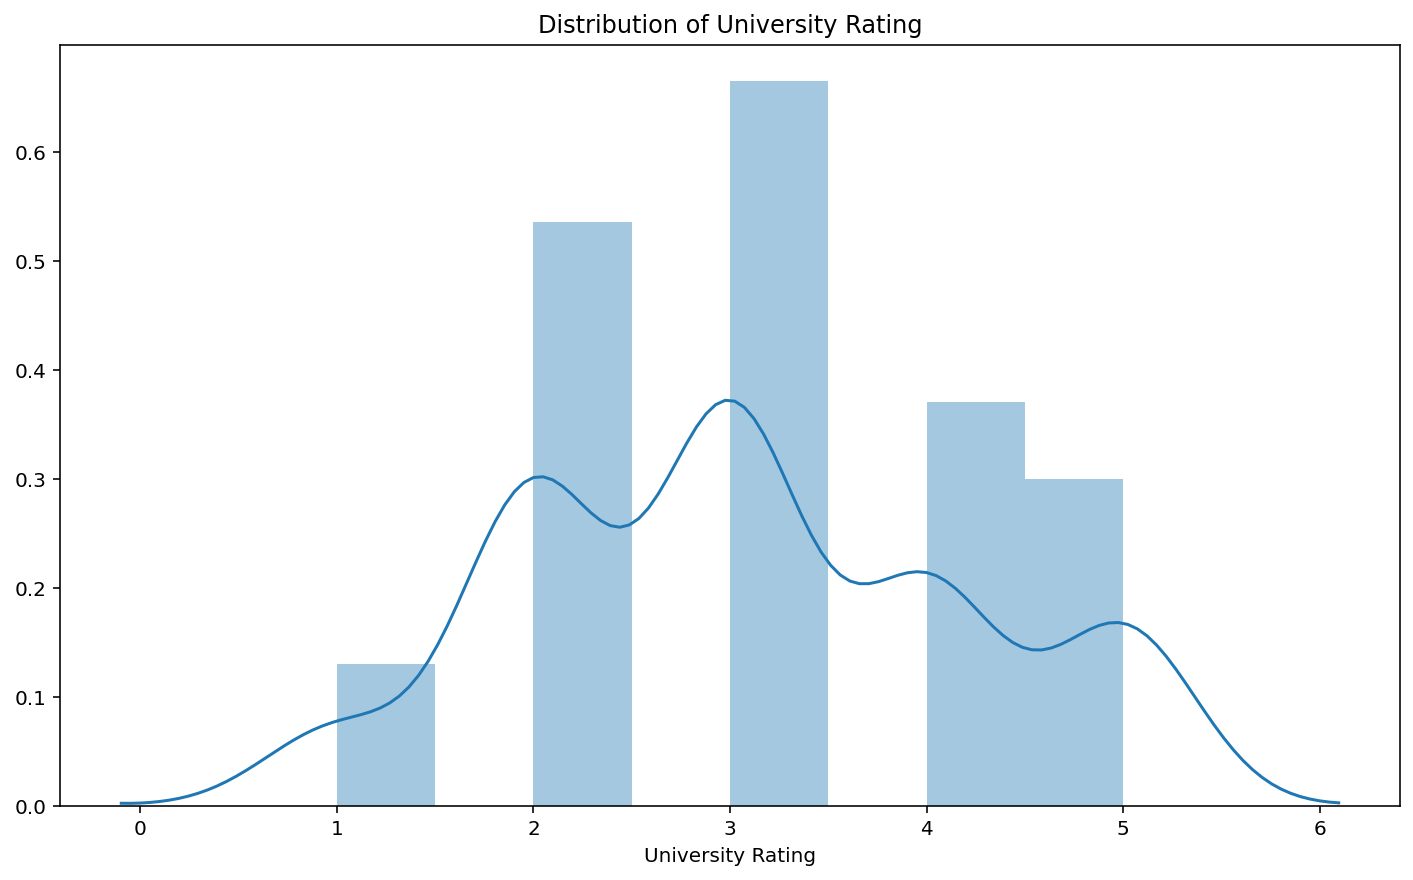

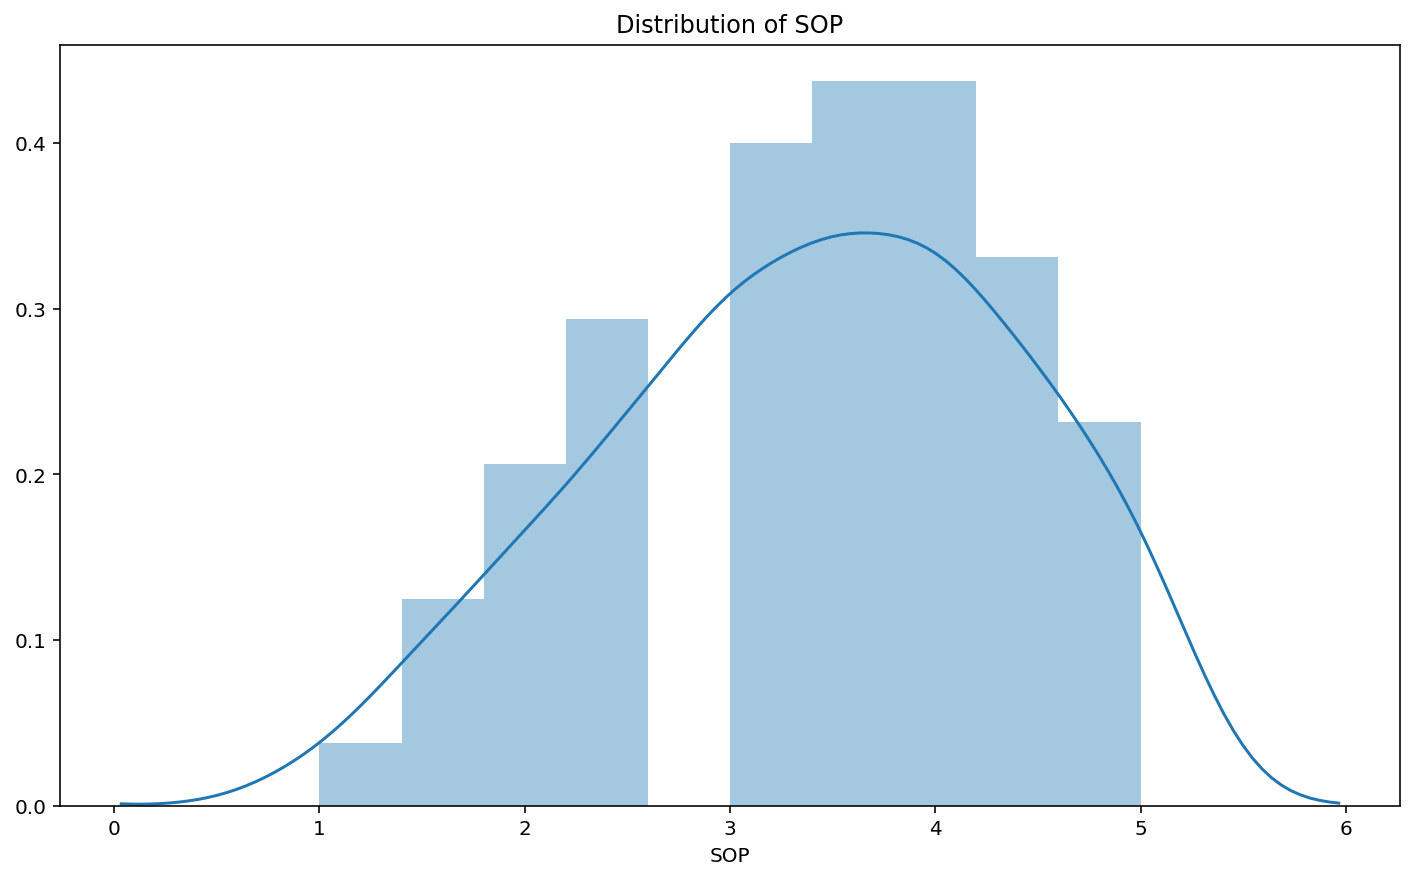

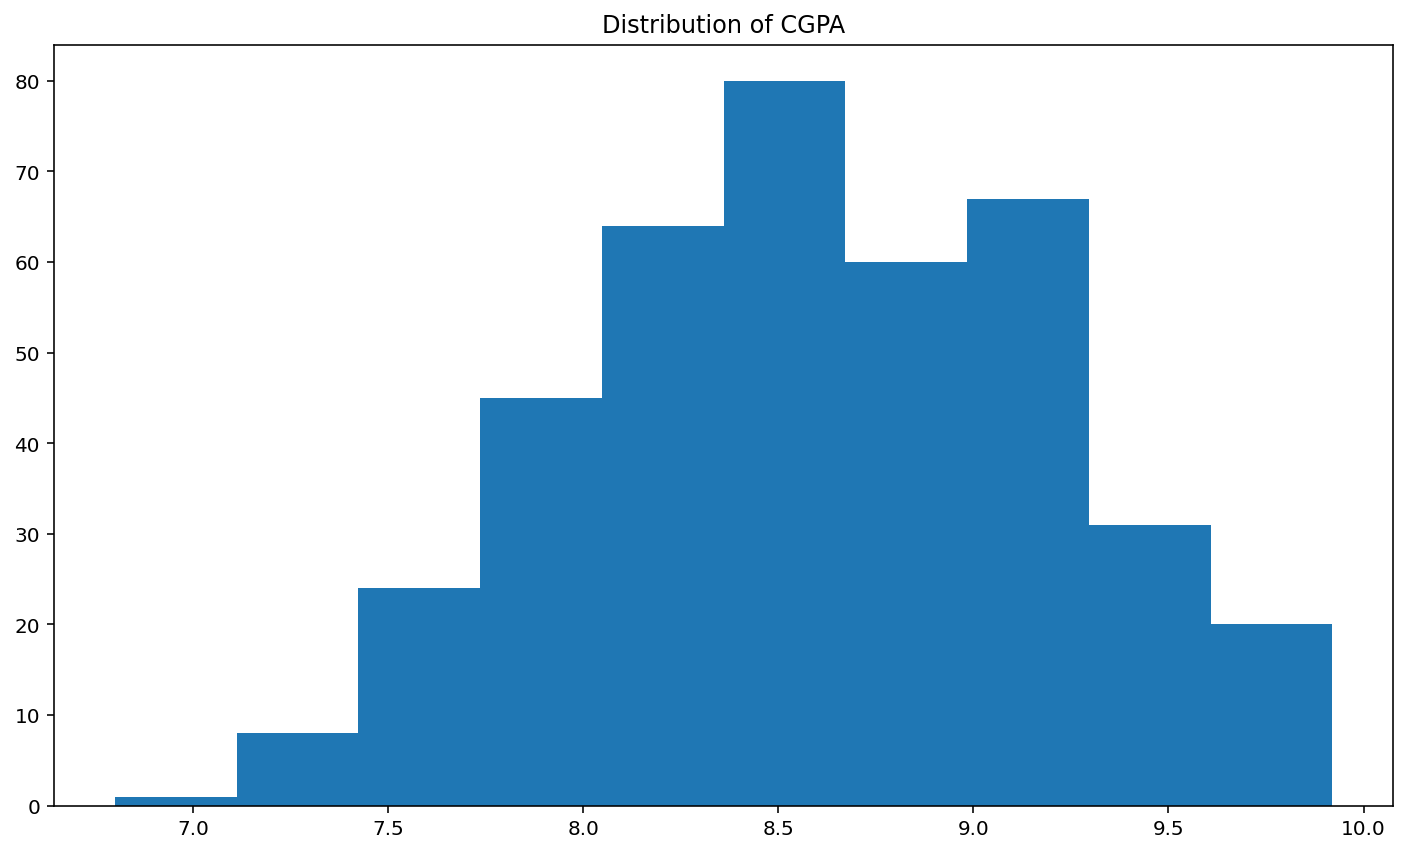

In [7]:
plt.figure(figsize=(5,5))
fig = sns.distplot(df['GRE Score'])
plt.title('Distribution of GRE Scores')
plt.show()

fig = sns.distplot(df['TOEFL Score'])
plt.title('Distribution of TOEFL Scores')
plt.show()

fig = sns.distplot(df['University Rating'])
plt.title('Distribution of University Rating')
plt.show()

fig = sns.distplot(df['SOP'])
plt.title('Distribution of SOP')
plt.show()

fig = plt.hist(df['CGPA'])
plt.title('Distribution of CGPA')
plt.show()

Text(0.5, 1.0, 'TOEFL Vs GRE')

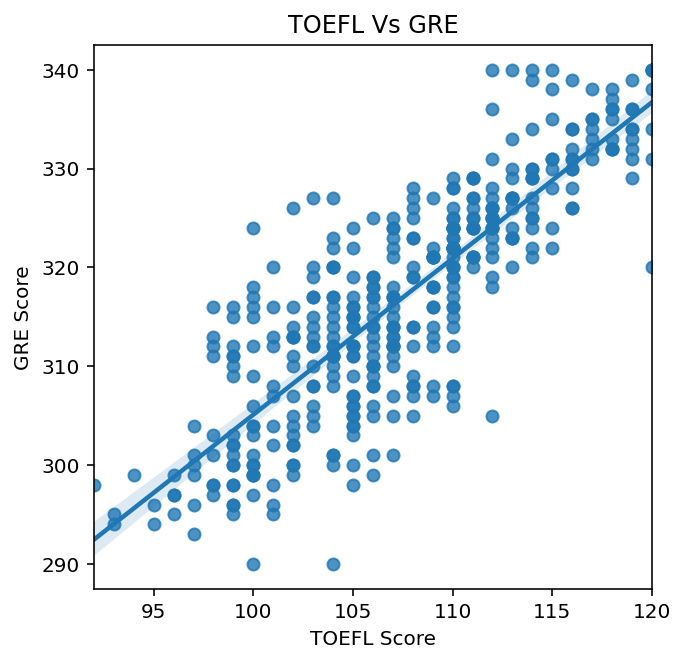

In [8]:
plt.figure(figsize=(5,5))
fig = sns.regplot(df['TOEFL Score'], df['GRE Score'])
plt.title('TOEFL Vs GRE')

Text(0.5, 1.0, 'GRE Score Vs CGPA')

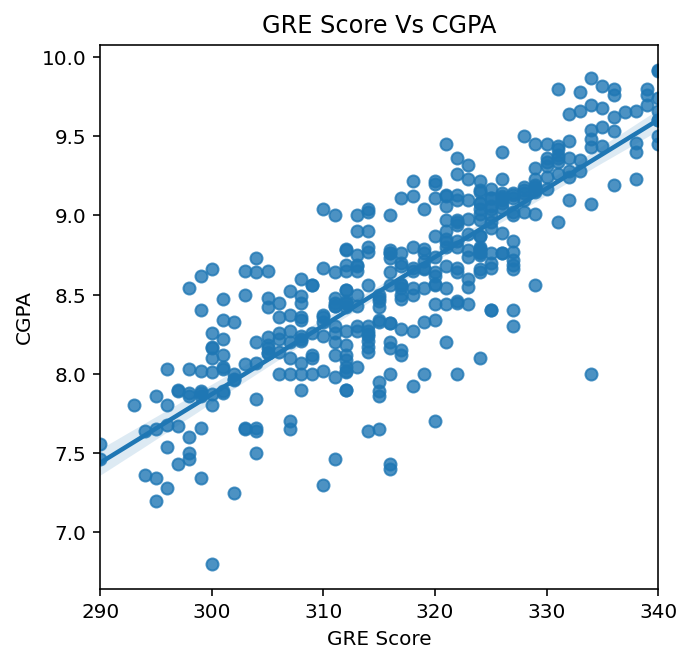

In [9]:
plt.figure(figsize=(5,5))
fig = sns.regplot(df['GRE Score'], df['CGPA'])
plt.title('GRE Score Vs CGPA')

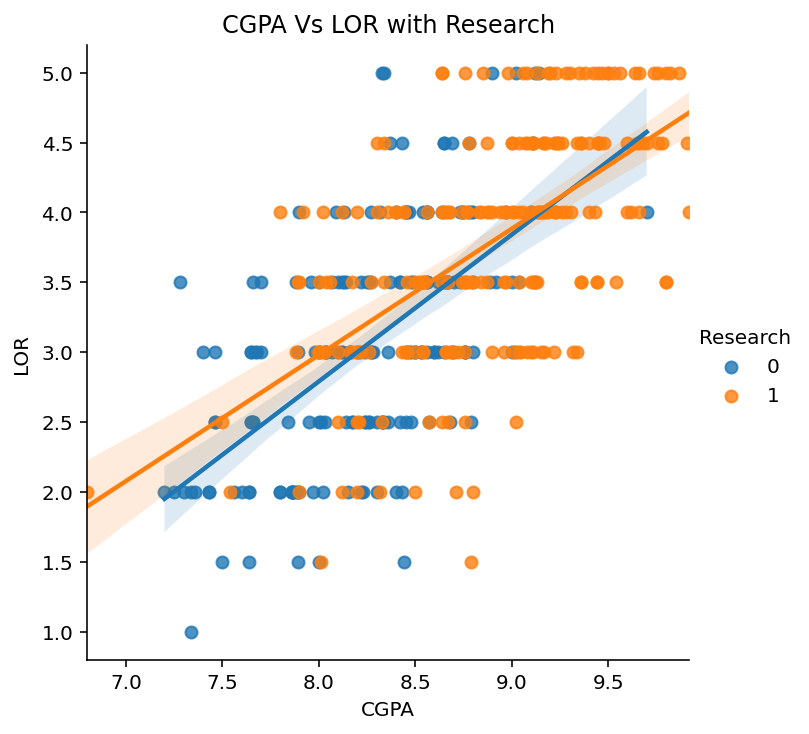

In [10]:
fig = sns.lmplot(x = 'CGPA', y = 'LOR ', data = df, hue='Research')
plt.title('CGPA Vs LOR with Research')
plt.show()

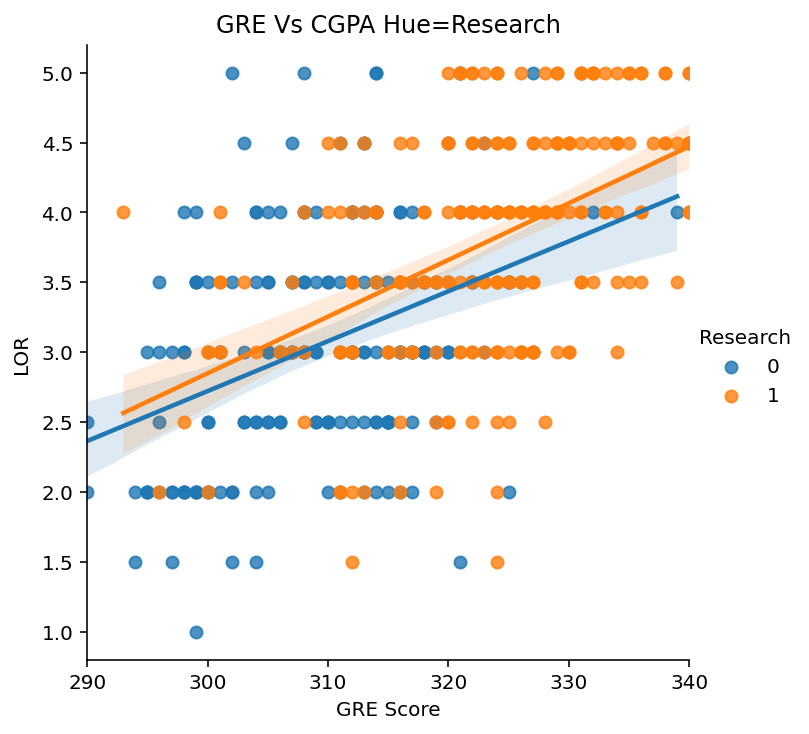

In [11]:
sns.lmplot(x= 'GRE Score', y='LOR ', data=df, hue= 'Research')
plt.title('GRE Vs CGPA Hue=Research')
plt.show()

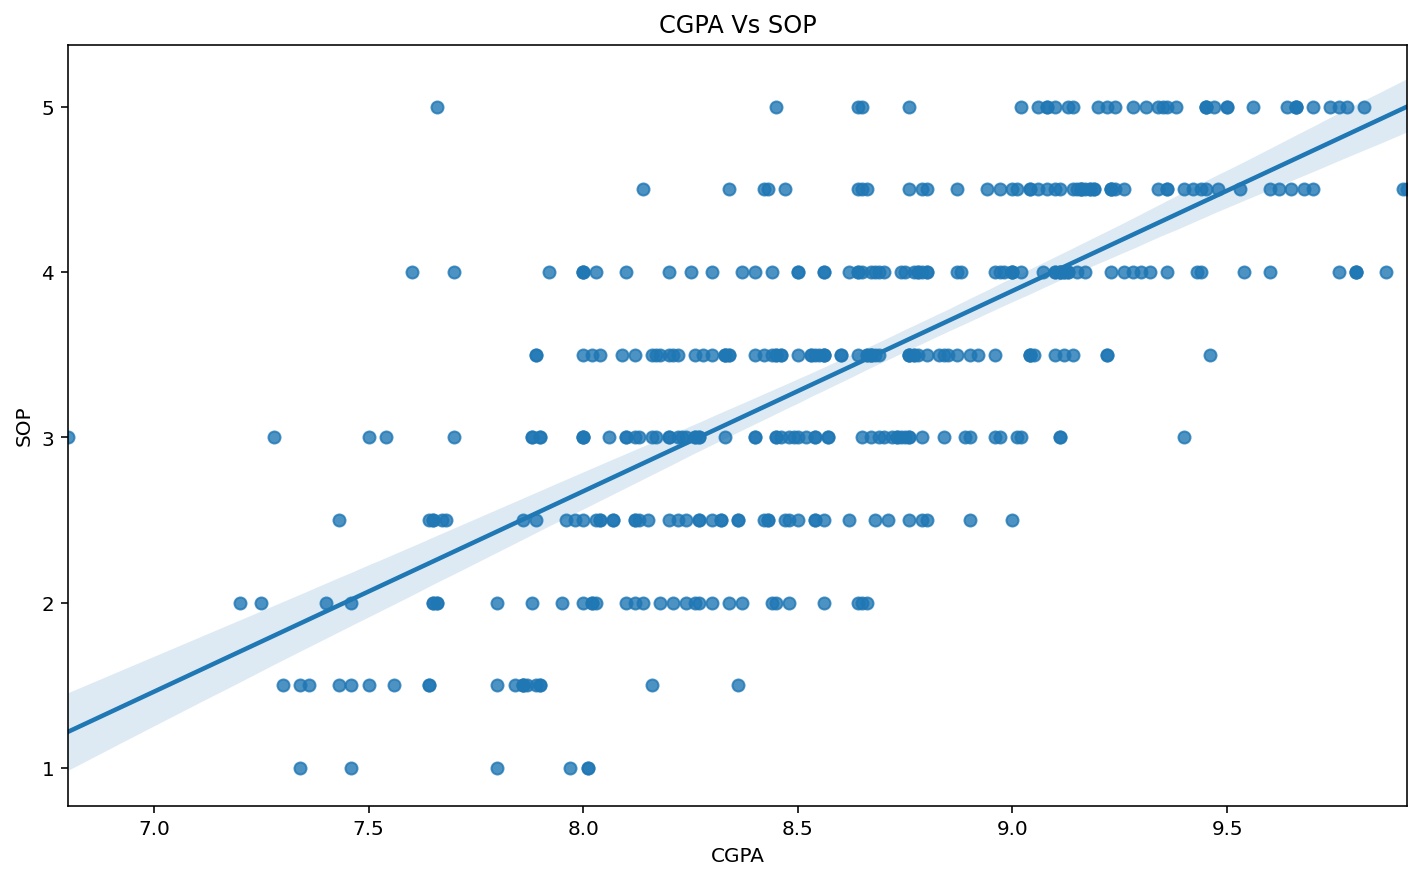

In [12]:
fig = sns.regplot(df['CGPA'], df['SOP'])
plt.title('CGPA Vs SOP')
plt.show()

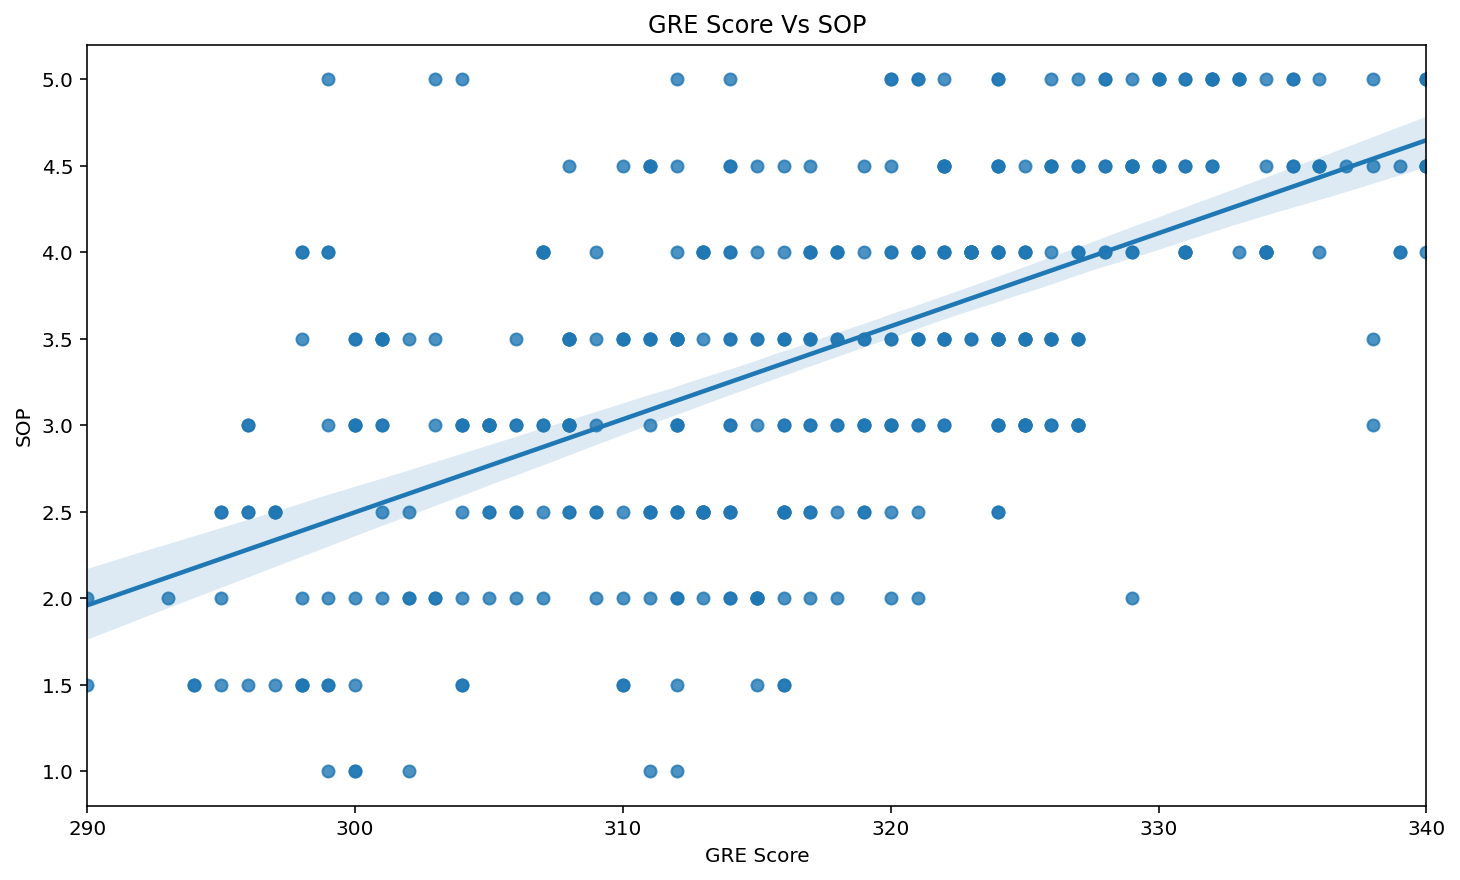

In [13]:
fig = sns.regplot(x='GRE Score', y='SOP', data=df)
plt.title('GRE Score Vs SOP')
plt.show()

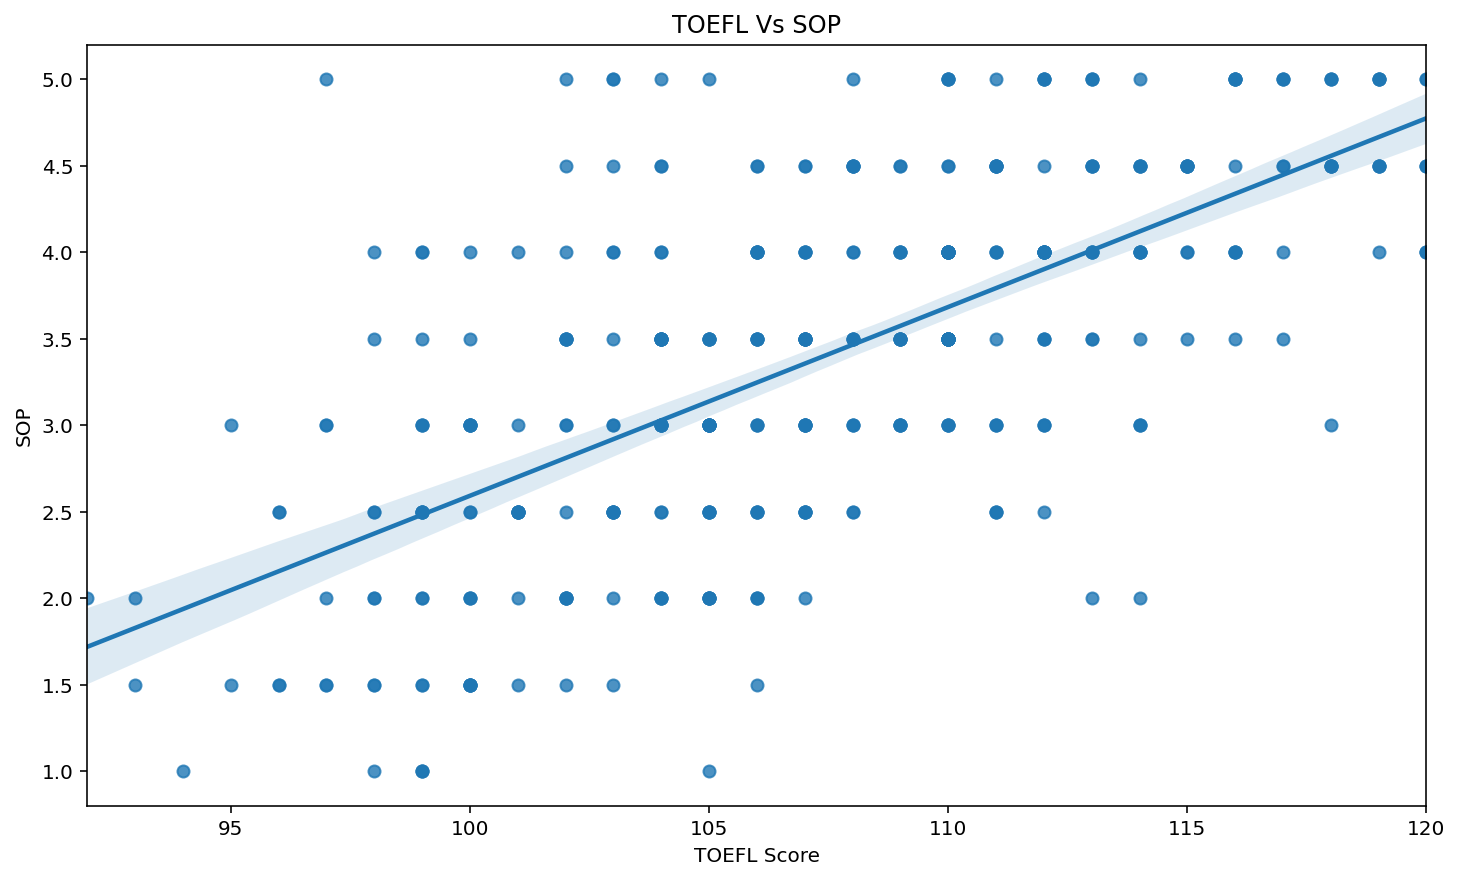

In [14]:
fig = sns.regplot(x='TOEFL Score', y='SOP', data=df)
plt.title('TOEFL Vs SOP')
plt.show()

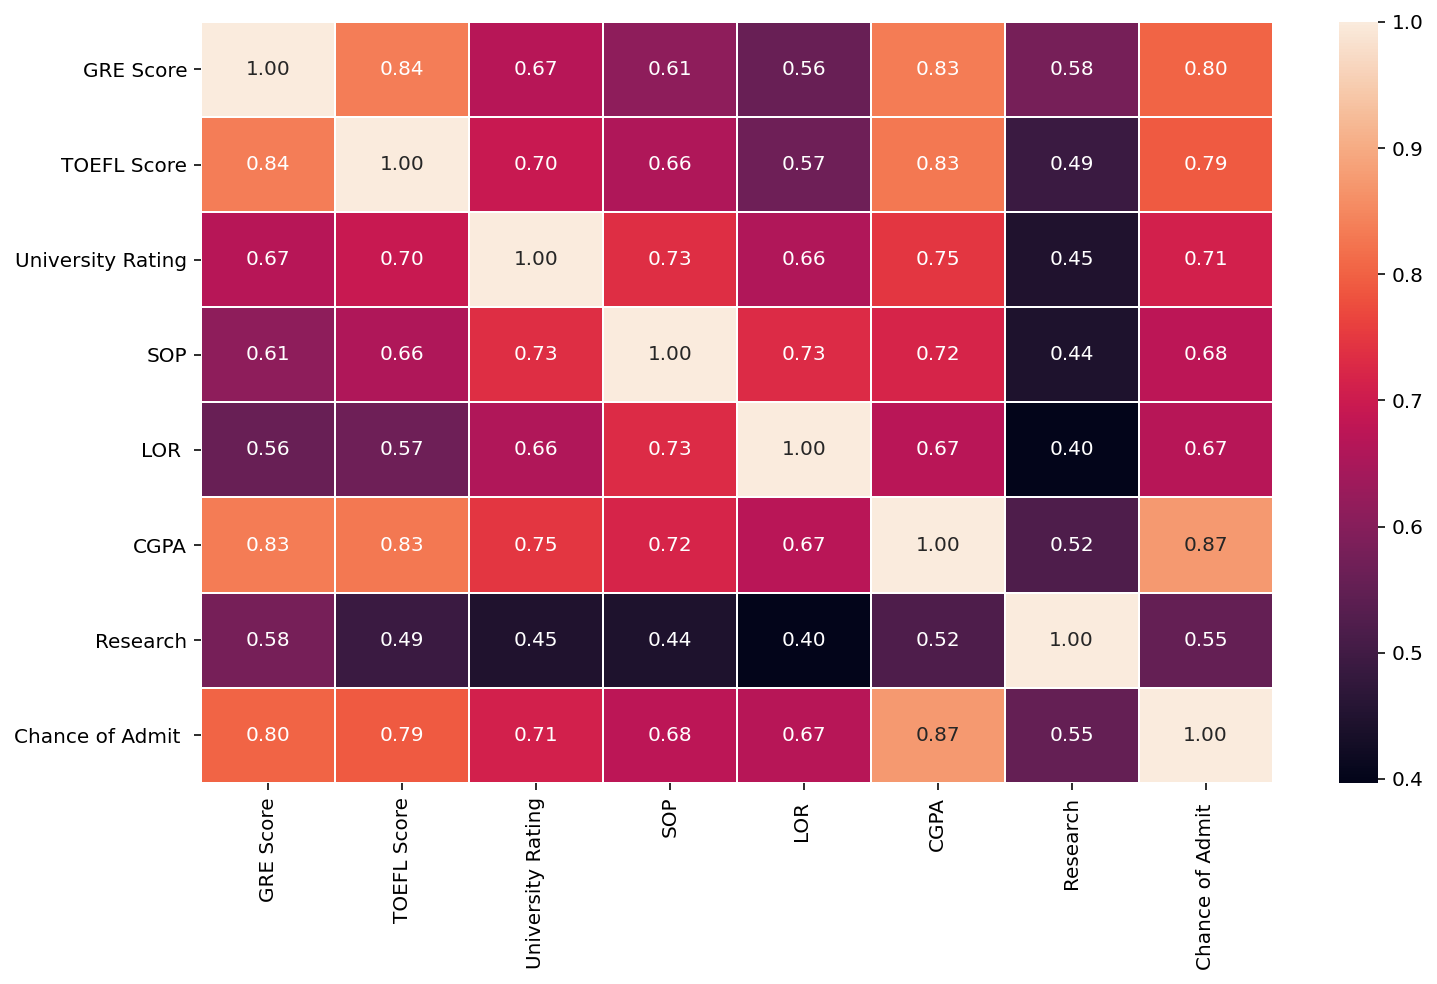

In [26]:
import numpy as np
corr = df.corr()
#colormap = sns.diverging_palette(220, 10, as_cmap= True)
#dropSelf = np.zeros_like(corr)
#dropSelf[np.triu_indices_from(dropSelf)] = True
sns.heatmap(corr, linewidths=.5, annot=True)
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
x = df.drop(['Chance of Admit '], axis=1)
y = df['Chance of Admit ']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, shuffle=False)

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor
from sklearn.metrics import mean_squared_error

In [39]:
models = [['Decision Tree :', DecisionTreeRegressor()],
         ['Linear Regression :', LinearRegression()],
         ['Random Forest :', RandomForestRegressor()],
         ['K Neighbors :', KNeighborsRegressor()],
         ['SVM :', SVR()],
         ['Ada Boost Classifier :', AdaBoostRegressor()],
         ['Gradient Boosting Classifier :', GradientBoostingRegressor()],
         ['XGBoost :', XGBRegressor()],
         ['Lasso :', Lasso()],
         ['Ridge :', Ridge()],
         ['Elastic Net :', ElasticNet()],
         ['Huber Regressor :', HuberRegressor()]]

In [40]:
print("Results...")
for name, model in models:
    model=model
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

Results...
Decision Tree : 0.09408108205160058
Linear Regression : 0.06473311695782082


Random Forest : 0.07262146462995633
K Neighbors : 0.07911794992288412
SVM : 0.08180727044650482
Ada Boost Classifier : 0.0834806077478956
Gradient Boosting Classifier : 0.06650949933829209
[19:12:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost : 0.0681331805795245
Lasso : 0.13137657075960432
Ridge : 0.06479970981992439
Elastic Net : 0.0980598738822262


Huber Regressor : 0.0688492948627345


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [42]:
classifier = RandomForestRegressor()
classifier.fit(x,y)
feature_name = x.columns
importance_frame = pd.DataFrame()
importance_frame['features'] = x.columns
importance_frame['importance'] = classifier.feature_importances_
importance_frame = importance_frame.sort_values(by=['importance'], ascending=True)

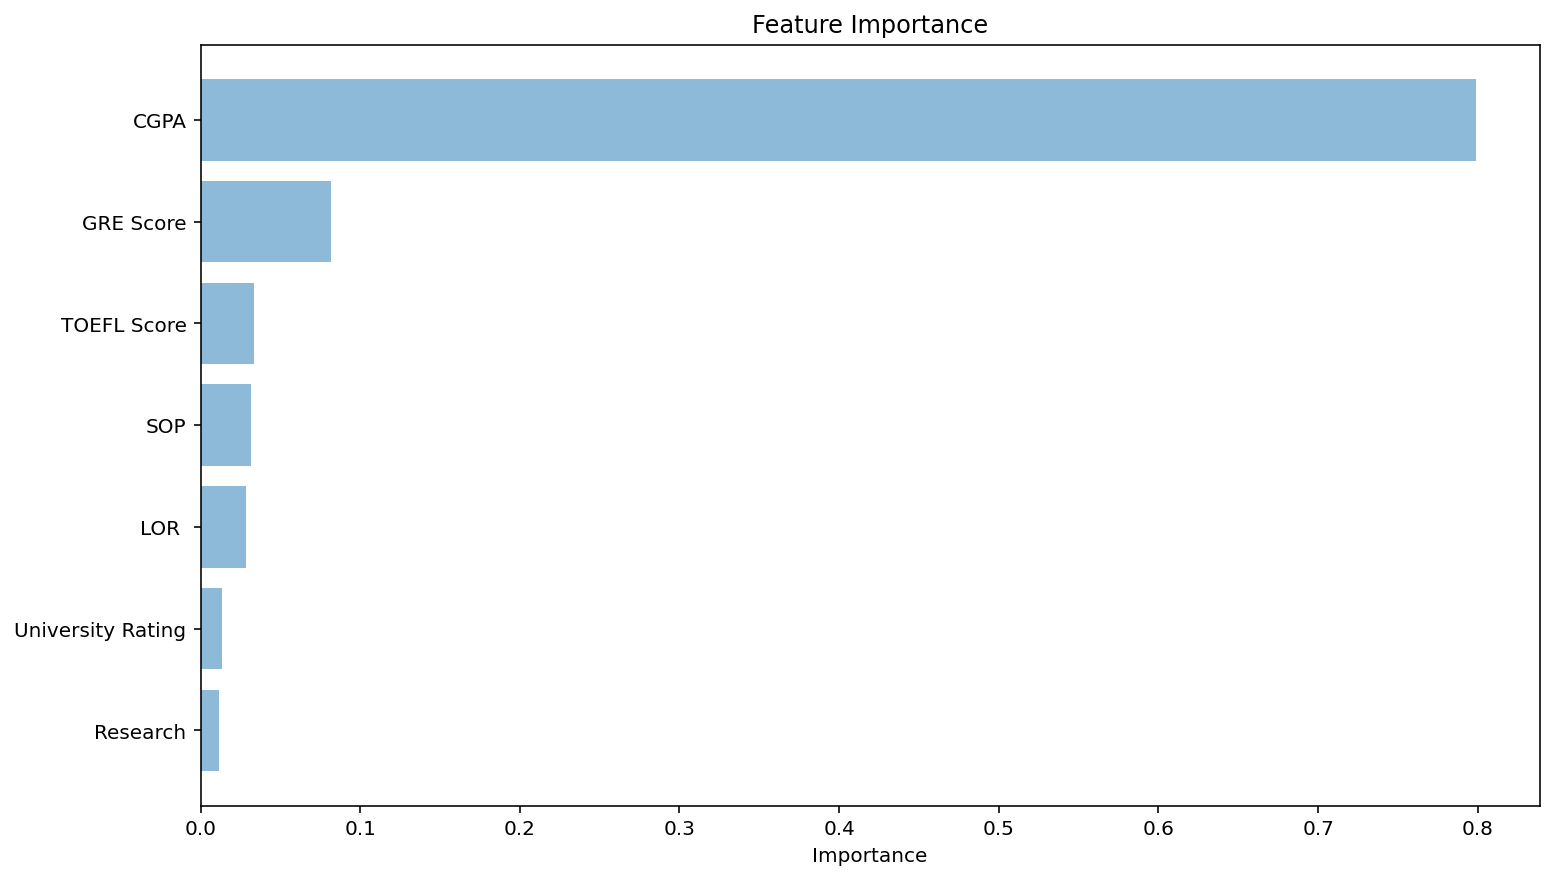

In [43]:
plt.barh([1,2,3,4,5,6,7], importance_frame['importance'], align='center', alpha =0.5)
plt.yticks([1,2,3,4,5,6,7], importance_frame['features'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()